Avocado!

This project is prepared for BrainStation Data Science certification program, submitted on June 10 2020.

Here I applied the skills and knowledge learned from the course, and the objective is to analyze and predict avocado prices using data obtrained from Kaggle (see link below). I explored several graphing libraries, utalized models and machine learning algorithm to the data for prediction:

1. Prophet for Time Series analysis, an open source library created by Facebook's Core Data Science team
2. Linear Regression
3. Decision Tree Regressor
4. Random Forest

The aim of this notebook is to practice my coding skills, and guess which model would give the best accuracy. it will be for fun purposes.

In [1]:
# Import Libraries
#. more libraries will be added as I go

import numpy as np # number arrays
import pandas as pd # dataframe
import matplotlib.pyplot as plt # matplotlib graphing
import seaborn as sns # sns graphing
sns.set_style('darkgrid')
import plotly.express as px # plotly graphing


from sklearn import metrics #scoring
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regressor
from sklearn.ensemble import RandomForestRegressor # Random Tree Forest
from sklearn.model_selection import train_test_split # Modelling 


from sklearn import tree # Import decision tree function
from sklearn.tree import export_graphviz
from IPython.display import Image # To display a image
import pydotplus # To create decision tree graph


from fbprophet import Prophet # Facebook Prophet for Time series forecasting
from fbprophet.plot import add_changepoints_to_plot

In [2]:
#read csv file and transform to dataframe
df = pd.read_csv('data/avocado_2020.csv')
df.head()

Date  AveragePrice  Total Volume     4046      4225    4770  \
0  15-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1  15-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2  15-01-18          1.17      44511.28   914.14  31540.32  135.77   
3  15-01-25          1.06      45147.50   941.38  33196.16  164.14   
4  15-02-01          0.99      70873.60  1353.90  60017.20  179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9716.46     9186.93      529.53          0.0  conventional  2015  Albany  
1     8424.77     8036.04      388.73          0.0  conventional  2015  Albany  
2    11921.05    11651.09      269.96          0.0  conventional  2015  Albany  
3    10845.82    10103.35      742.47          0.0  conventional  2015  Albany  
4     9323.18     9170.82      152.36          0.0  conventional  2015  Albany

In [3]:
# check data type
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
# To change "Date" from object to datetime
df['Date_2'] = '20' + df['Date']
df.head()

Date  AveragePrice  Total Volume     4046      4225    4770  \
0  15-01-04          1.22      40873.28  2819.50  28287.42   49.90   
1  15-01-11          1.24      41195.08  1002.85  31640.34  127.12   
2  15-01-18          1.17      44511.28   914.14  31540.32  135.77   
3  15-01-25          1.06      45147.50   941.38  33196.16  164.14   
4  15-02-01          0.99      70873.60  1353.90  60017.20  179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     8424.77     8036.04      388.73          0.0  conventional  2015   
2    11921.05    11651.09      269.96          0.0  conventional  2015   
3    10845.82    10103.35      742.47          0.0  conventional  2015   
4     9323.18     9170.82      152.36          0.0  conventional  2015   

   region      Date_2  
0  Albany  2015-01-04  
1  Albany  2015-01-11  
2  Albany  2015-01-18  
3  Albany  2015-01-25  
4  Albany  2015-02-01

In [5]:
df['Date_3'] = pd.to_datetime(df['Date_2'])
df = df.rename(columns={"4046" : "Small Hass", 
                        "4225" : "Large Hass",
                        "4770" : "XLarge Hass" })
df2 = df.copy()
df2.head()

Date  AveragePrice  Total Volume  Small Hass  Large Hass  XLarge Hass  \
0  15-01-04          1.22      40873.28     2819.50    28287.42        49.90   
1  15-01-11          1.24      41195.08     1002.85    31640.34       127.12   
2  15-01-18          1.17      44511.28      914.14    31540.32       135.77   
3  15-01-25          1.06      45147.50      941.38    33196.16       164.14   
4  15-02-01          0.99      70873.60     1353.90    60017.20       179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     8424.77     8036.04      388.73          0.0  conventional  2015   
2    11921.05    11651.09      269.96          0.0  conventional  2015   
3    10845.82    10103.35      742.47          0.0  conventional  2015   
4     9323.18     9170.82      152.36          0.0  conventional  2015   

   region      Date_2     Date_3  
0  Albany  2015-01-04 2015-01-04  
1  Albany  2015-01-11 2015-01-11  
2  Albany  2015-01-18 2015-01-18  
3  Albany  2015-01-25 2015-01-25  
4  Albany  2015-02-01 2015-02-01

In [6]:
df2 = df2[['Date_3', 'AveragePrice', 'Total Volume', 'Small Hass', 'Large Hass','XLarge Hass','Total Bags',
            'Small Bags', 'Large Bags','XLarge Bags','type','year','region']]

df2 = df2.rename(columns={"Date_3" : "Date"})

df2.head()

Date  AveragePrice  Total Volume  Small Hass  Large Hass  XLarge Hass  \
0 2015-01-04          1.22      40873.28     2819.50    28287.42        49.90   
1 2015-01-11          1.24      41195.08     1002.85    31640.34       127.12   
2 2015-01-18          1.17      44511.28      914.14    31540.32       135.77   
3 2015-01-25          1.06      45147.50      941.38    33196.16       164.14   
4 2015-02-01          0.99      70873.60     1353.90    60017.20       179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9716.46     9186.93      529.53          0.0  conventional  2015  Albany  
1     8424.77     8036.04      388.73          0.0  conventional  2015  Albany  
2    11921.05    11651.09      269.96          0.0  conventional  2015  Albany  
3    10845.82    10103.35      742.47          0.0  conventional  2015  Albany  
4     9323.18     9170.82      152.36          0.0  conventional  2015  Albany

In [7]:
# check data type again
df2.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
Small Hass             float64
Large Hass             float64
XLarge Hass            float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [8]:
#check dataframe size
df2.shape

(27323, 13)

In [9]:
#check if dataframe has any null values
df2.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
Small Hass      0
Large Hass      0
XLarge Hass     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
# To check the number of regions/ states, and if there are any repeats
regions = df2.groupby(df2.region)
print("Total regions :", len(regions))
for name, group in regions:
    print(name, len(group))

Total regions : 54
Albany 506
Atlanta 506
BaltimoreWashington 506
Boise 506
Boston 506
BuffaloRochester 506
California 506
Charlotte 506
Chicago 506
CincinnatiDayton 506
Columbus 506
DallasFtWorth 506
Denver 506
Detroit 506
GrandRapids 506
GreatLakes 506
HarrisburgScranton 506
HartfordSpringfield 506
Houston 506
Indianapolis 506
Jacksonville 506
LasVegas 506
LosAngeles 506
Louisville 506
MiamiFtLauderdale 506
Midsouth 506
Nashville 506
NewOrleansMobile 506
NewYork 506
Northeast 506
NorthernNewEngland 506
Orlando 506
Philadelphia 506
PhoenixTucson 506
Pittsburgh 506
Plains 506
Portland 506
RaleighGreensboro 506
RichmondNorfolk 506
Roanoke 506
Sacramento 506
SanDiego 506
SanFrancisco 506
Seattle 506
SouthCarolina 506
SouthCentral 506
Southeast 506
Spokane 506
StLouis 506
Syracuse 506
Tampa 506
TotalUS 506
West 506
WestTexNewMexico 505


In [11]:
df2.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [12]:
# to remove "regions" shown as a state
new_regions = ['California', 'GreatLakes', 'Midsouth', 'NewYork', 'Northeast', 'SouthCarolina', 'Plains', 'SouthCentral', 'Southeast', 'TotalUS', 'West']
df2 = df2[~df2.region.isin(new_regions)]
len(df2.region.unique())

43

In [13]:
# to summarize the dataframe
df2.describe().T

count           mean            std      min       25%  \
AveragePrice  21757.0       1.402104       0.393658     0.44      1.11   
Total Volume  21757.0  263674.598963  555169.419856    84.56  10351.99   
Small Hass    21757.0   84671.432085  226547.691567     0.00    459.35   
Large Hass    21757.0   81902.463587  178299.673845     0.00   1910.94   
XLarge Hass   21757.0    6894.062203   20806.029382     0.00      0.00   
Total Bags    21757.0   90181.835303  201517.443429     0.00   5599.50   
Small Bags    21757.0   64062.984854  157968.837668     0.00   3268.45   
Large Bags    21757.0   24593.394864   65432.391201     0.00     98.15   
XLarge Bags   21757.0    1525.454176    9223.449741     0.00      0.00   
year          21757.0    2016.956612       1.406539  2015.00   2016.00   

                   50%        75%          max  
AveragePrice      1.36       1.64         3.25  
Total Volume  69326.51  336236.68  25394902.82  
Small Hass     5057.70   80177.15   9153158.54  
Large Hass    13741.41   88833.96   8354516.32  
XLarge Hass      86.00    3156.71    417270.70  
Total Bags    28902.23   98469.34   7528927.12  
Small Bags    20161.46   74086.09   5513111.70  
Large Bags     2401.43   18477.36   1976738.84  
XLarge Bags       0.00     176.67    408007.91  
year           2017.00    2018.00      2019.00

# Data Analysis

In [14]:
year_count = df2.groupby('year').agg('count')

year_count = df2.drop(['AveragePrice', 'Total Volume', 'Total Bags','Small Bags','Large Bags','XLarge Bags', 'type', 'region', 'Small Hass', 'Large Hass', 'XLarge Hass'], axis = 1).groupby('year').agg('count')
year_count.reset_index(inplace=True)

print(year_count.dtypes)
year_count.head()

year    int64
Date    int64
dtype: object


year  Date
0  2015  4471
1  2016  4472
2  2017  4472
3  2018  4214
4  2019  4128

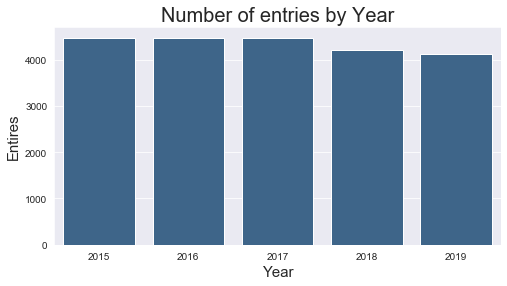

In [15]:
plt.figure(figsize=(8,4))
sns.barplot(x="year", y="Date", data=year_count, color = '#316596')
plt.title("Number of entries by Year",fontsize = 20)
plt.xlabel('Year',fontsize = 15)
plt.ylabel('Entires',fontsize = 15);

In [16]:
#pull out data that are conventional
conventional = df2[df2['type'] =="conventional"]
conventional.head()

Date  AveragePrice  Total Volume  Small Hass  Large Hass  XLarge Hass  \
0 2015-01-04          1.22      40873.28     2819.50    28287.42        49.90   
1 2015-01-11          1.24      41195.08     1002.85    31640.34       127.12   
2 2015-01-18          1.17      44511.28      914.14    31540.32       135.77   
3 2015-01-25          1.06      45147.50      941.38    33196.16       164.14   
4 2015-02-01          0.99      70873.60     1353.90    60017.20       179.32   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     9716.46     9186.93      529.53          0.0  conventional  2015  Albany  
1     8424.77     8036.04      388.73          0.0  conventional  2015  Albany  
2    11921.05    11651.09      269.96          0.0  conventional  2015  Albany  
3    10845.82    10103.35      742.47          0.0  conventional  2015  Albany  
4     9323.18     9170.82      152.36          0.0  conventional  2015  Albany

In [17]:
#pull out data that are organic
organic = df2[df2['type'] =="organic"]
organic.head()

Date  AveragePrice  Total Volume  Small Hass  Large Hass  \
13662 2015-01-04          1.79       1373.95       57.42      153.88   
13663 2015-01-11          1.77       1182.56       39.00      305.12   
13664 2015-01-18          1.93       1118.47        8.02      178.78   
13665 2015-01-25          1.89       1115.89       14.87      148.72   
13666 2015-02-01          1.83       1228.51       33.12       99.36   

       XLarge Hass  Total Bags  Small Bags  Large Bags  XLarge Bags     type  \
13662          0.0     1162.65     1162.65         0.0          0.0  organic   
13663          0.0      838.44      838.44         0.0          0.0  organic   
13664          0.0      931.67      931.67         0.0          0.0  organic   
13665          0.0      952.30      952.30         0.0          0.0  organic   
13666          0.0     1096.03     1096.03         0.0          0.0  organic   

       year  region  
13662  2015  Albany  
13663  2015  Albany  
13664  2015  Albany  
13665  2015  Albany  
13666  2015  Albany

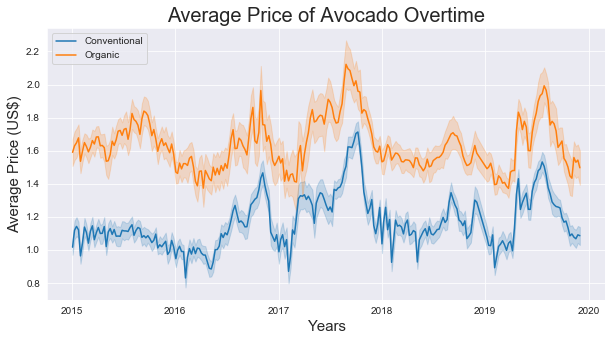

In [18]:
#plot graph with 2 lines that shows conventional vs organic
plt.figure(figsize=(10,5))
sns.lineplot("Date", "AveragePrice", data=conventional)
sns.lineplot("Date", "AveragePrice", data=organic)

#make sure legend are put in the right order, based on the 2 above lines
plt.title("Average Price of Avocado Overtime", fontsize = 20)
plt.legend(loc='upper left', labels=['Conventional', 'Organic']) 
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Average Price (US$)',fontsize = 15);

In [19]:
# to melt the dataframe, and groupby the "year" with the total volume of Hass by unit
df2_sum = df2.drop(['AveragePrice', 'Total Volume', 'Total Bags','Small Bags','Large Bags','XLarge Bags'], axis = 1).groupby('year').agg('sum')
df2_sum.reset_index(inplace=True)

df2_melt = pd.melt(df2_sum, id_vars=["year"], value_vars=["Small Hass", "Large Hass", "XLarge Hass"])
df2_melt = df2_melt.rename(columns={'variable':'size'})
df2_melt.head()

year        size         value
0  2015  Small Hass  3.956835e+08
1  2016  Small Hass  3.373537e+08
2  2017  Small Hass  4.064979e+08
3  2018  Small Hass  3.783529e+08
4  2019  Small Hass  3.243083e+08

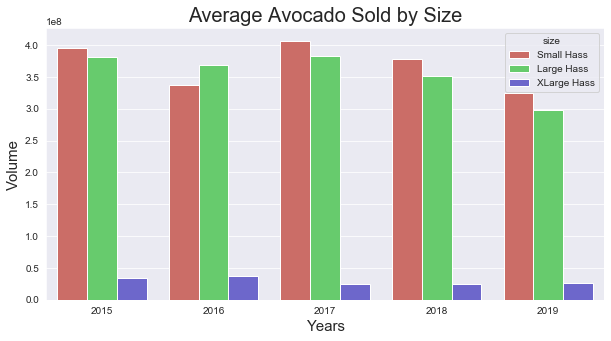

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(x="year", y="value", hue="size", data=df2_melt, palette="hls")
plt.title("Average Avocado Sold by Size",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Volume',fontsize = 15);

In [21]:
# to melt the dataframe, and groupby the "year" with the total volume of Hass by bags
df3_sum = df2.drop(['AveragePrice', 'Total Volume', 'Total Bags','Small Hass','Large Hass','XLarge Hass'], axis = 1).groupby('year').agg('sum')
df3_sum.reset_index(inplace=True)

df3_melt = pd.melt(df3_sum, id_vars=["year"], value_vars=["Small Bags", "Large Bags", "XLarge Bags"])
df3_melt = df3_melt.rename(columns={'variable':'size'})
df3_melt.head()

year        size         value
0  2015  Small Bags  1.424565e+08
1  2016  Small Bags  2.630756e+08
2  2017  Small Bags  3.117222e+08
3  2018  Small Bags  3.310458e+08
4  2019  Small Bags  3.455182e+08

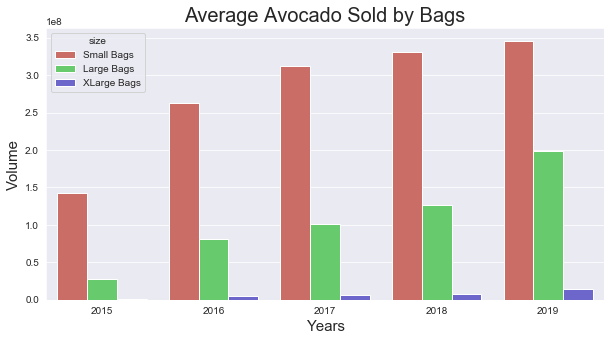

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(x="year", y="value", hue="size", data=df3_melt, palette="hls")
plt.title("Average Avocado Sold by Bags",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Volume',fontsize = 15);

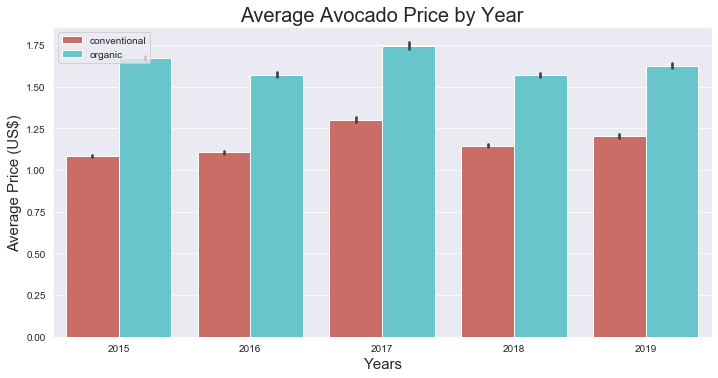

In [23]:
# to visualize conventional vs organic Average prices by year
plt.figure(figsize=(10,5))
sns.barplot(x="year", y="AveragePrice", hue="type", data=df2, palette="hls")
plt.tight_layout()
plt.legend(loc='upper left') 
plt.title("Average Avocado Price by Year",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Average Price (US$)',fontsize = 15);

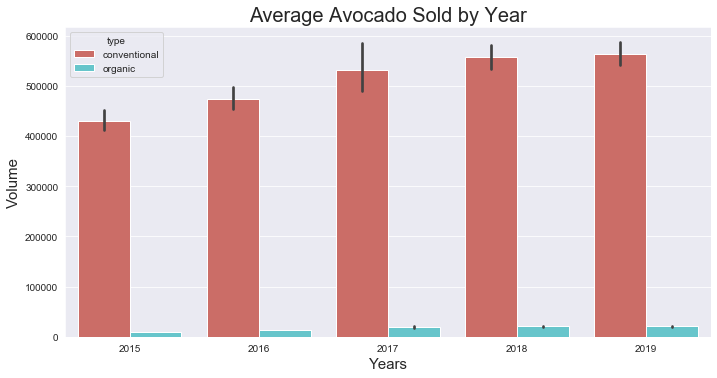

In [24]:
# to visualize conventional vs organic Average volume sold by year
plt.figure(figsize=(10,5))
sns.barplot(x="year", y="Total Volume",hue="type",data=df2,palette="hls")
plt.tight_layout()
plt.title("Average Avocado Sold by Year",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Volume',fontsize = 15);

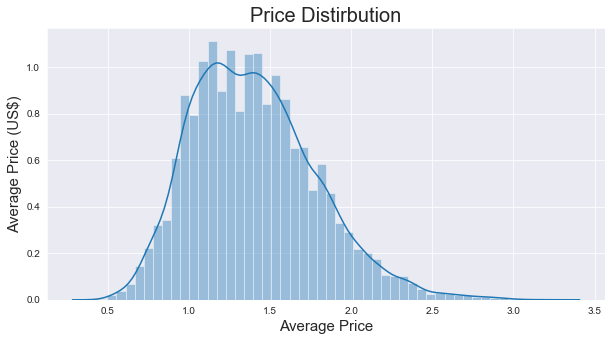

In [25]:
#price distribution
plt.figure(figsize=(10,5))
sns.distplot(df["AveragePrice"])
plt.title("Price Distirbution",{'fontsize':'20'})
plt.xlabel('Average Price',{'fontsize' : '15'})
plt.ylabel('Average Price (US$)',{'fontsize':'15'});

In [26]:
df3 = df2[['region','AveragePrice']]

df3 = df3.groupby('region').mean()
df4 = df3.reset_index()
df4.head()

region  AveragePrice
0               Albany      1.529308
1              Atlanta      1.315237
2  BaltimoreWashington      1.507253
3                Boise      1.430059
4               Boston      1.520791

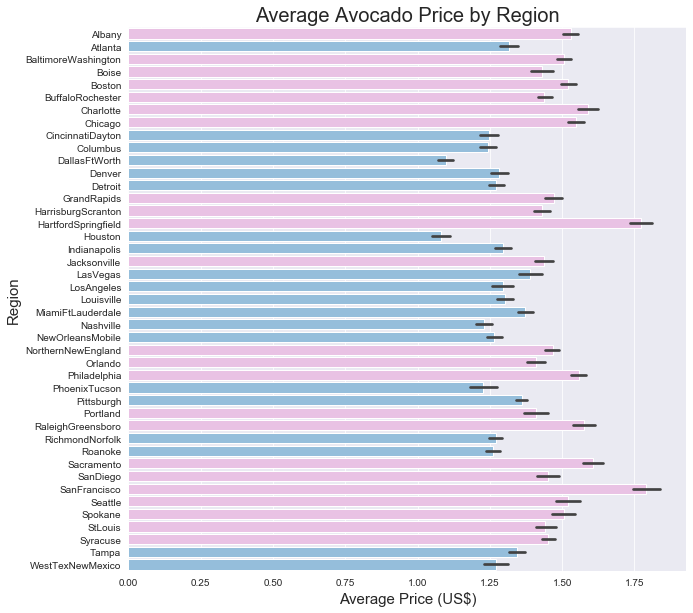

In [27]:
#graph represents both organic and conventional avocado average prices
#to highlight areas that have average price > average

custom_palette = {}
for q in set(df2.region):
    avg = (np.average(df2[df2.region ==q].AveragePrice))
    if avg > 1.402:
        custom_palette[q] = '#F0BBE9'
    else:
        custom_palette[q] = '#89C0E7'
        
plt.figure(figsize=(10,10))
average= sns.barplot(x="AveragePrice", y="region",data= df2, palette = custom_palette)
plt.title("Average Avocado Price by Region", {'fontsize':'20'})
plt.xlabel('Average Price (US$)',{'fontsize' : '15'})
plt.ylabel('Region',{'fontsize':'15'});

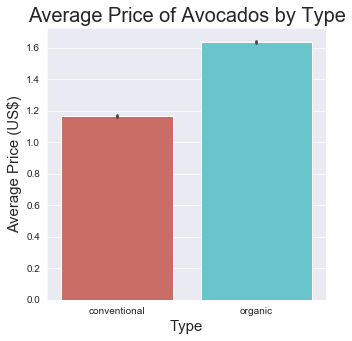

In [28]:
# The average prices of avocados by types - conventional vs organic
plt.figure(figsize=(5,5))
average= sns.barplot(x="type",y="AveragePrice",data= df2, palette='hls')
plt.title("Average Price of Avocados by Type", {'fontsize' : '20'})
plt.xlabel('Type',{'fontsize' : '15'})
plt.ylabel('Average Price (US$)',{'fontsize':'15'});

In [29]:
# prepare dataframe for data correlation analysis
df2[['Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Total Volume', 'Total Bags']].corr()

Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
Small Hass      1.000000    0.642408     0.485296    0.767553    0.524160   
Large Hass      0.642408    1.000000     0.538942    0.648531    0.428804   
XLarge Hass     0.485296    0.538942     1.000000    0.527874    0.248468   
Small Bags      0.767553    0.648531     0.527874    1.000000    0.452202   
Large Bags      0.524160    0.428804     0.248468    0.452202    1.000000   
XLarge Bags     0.362894    0.224527     0.463321    0.574128    0.221577   
Total Volume    0.918765    0.842291     0.595769    0.888644    0.611121   
Total Bags      0.788486    0.657890     0.515682    0.957004    0.689320   

              XLarge Bags  Total Volume  Total Bags  
Small Hass       0.362894      0.918765    0.788486  
Large Hass       0.224527      0.842291    0.657890  
XLarge Hass      0.463321      0.595769    0.515682  
Small Bags       0.574128      0.888644    0.957004  
Large Bags       0.221577      0.611121    0.689320  
XLarge Bags      1.000000      0.443644    0.567772  
Total Volume     0.443644      1.000000    0.915340  
Total Bags       0.567772      0.915340    1.000000

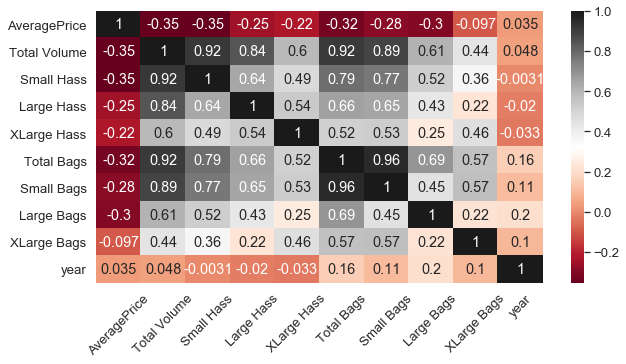

In [30]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(),cmap='RdGy',annot=True)
plt.xticks(rotation='45');

In [32]:
#what does the corrleation table tell us?


# Predicting avocado prices using Prophet Time Series Analysis

In [31]:
# Time Series Analysis

# Create new table with Date and Average Price only
df_time = df2[['Date', 'AveragePrice']]
df_time = df_time.set_index('Date')

df_week = df_time.resample('W').mean()
df_prophet = df_week.reset_index().dropna()

df_prophet.sort_values(by=['Date'])
df_prophet.head()

Date  AveragePrice
0 2015-01-04      1.302791
1 2015-01-11      1.373488
2 2015-01-18      1.394651
3 2015-01-25      1.398837
4 2015-02-01      1.249302

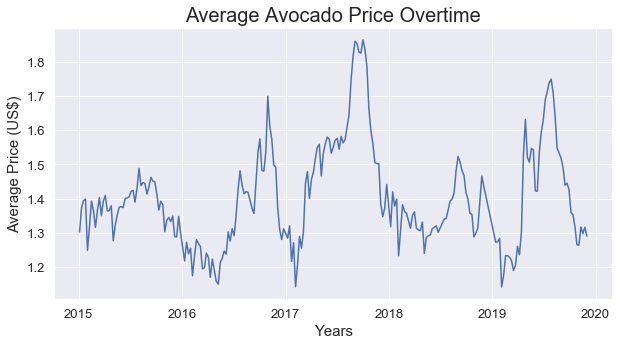

In [32]:
# Take a look at the price change overtime
plt.figure(figsize=(10,5))
sns.lineplot("Date", "AveragePrice", data=df_prophet)
plt.title("Average Avocado Price Overtime",{'fontsize':'20'})
plt.xlabel('Years',{'fontsize' : '15'})
plt.ylabel('Average Price (US$)',{'fontsize':'15'});

In [33]:
# In order to do time-series analysis using Prophet, we first need to chanage the column names to datetime(ds) and variable (y)
df_prophet = df_prophet.rename(columns={'Date':'ds', 'AveragePrice':'y'})
df_prophet.head()

ds         y
0 2015-01-04  1.302791
1 2015-01-11  1.373488
2 2015-01-18  1.394651
3 2015-01-25  1.398837
4 2015-02-01  1.249302

In [34]:
# Interval_width sets the uncertainty interval to produce a confidence interval around the forecast
# Set model parameters
p=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=False, changepoint_range=1) 

# fit data into the model
p.fit(df_prophet)

# Set prediction period, here I am looking at monthly for 12 months
future = p.make_future_dataframe(freq='M', periods=12) 

future.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
0 2015-01-04
1 2015-01-11
2 2015-01-18
3 2015-01-25
4 2015-02-01

In [35]:
forecast = p.predict(df_prophet)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds      yhat  yhat_lower  yhat_upper
0 2015-01-04  1.334471    1.157709    1.512726
1 2015-01-11  1.334953    1.145861    1.527538
2 2015-01-18  1.320646    1.142672    1.511366
3 2015-01-25  1.293046    1.100789    1.456386
4 2015-02-01  1.265402    1.102163    1.443040

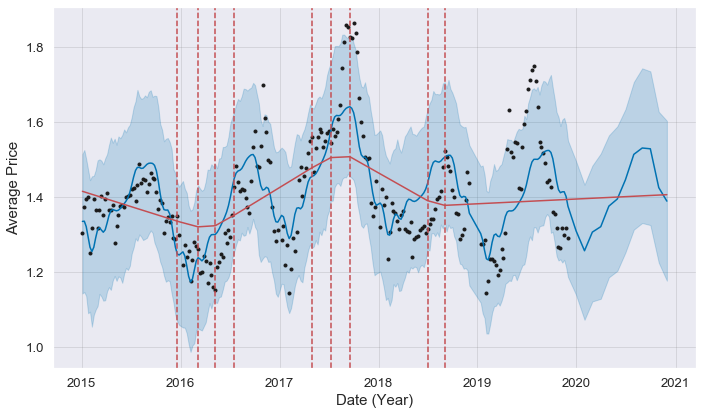

In [36]:
from fbprophet.plot import add_changepoints_to_plot

forecast = p.predict(future)
fig = p.plot(forecast)
# show potential changepoints
# by default changepoints are only inferred for the first 80% of the time series
a = add_changepoints_to_plot(fig.gca(), p, forecast) 

ax = fig.gca()
#ax.set_title("Trend", size=20)
ax.set_xlabel("Date (Year)", size=15)
ax.set_ylabel("Average Price", size=15);

In [37]:
# on the side I also tried to use plotly to plot forcasting figure
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(p, forecast)  # This returns a plotly Figure
py.iplot(fig)

# Predicting avocado prices using ML Analysis

In [38]:
df5 = df2.drop(['Date','Total Bags','Total Volume', 'year','region'], axis = 1)
df5.head()

AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
0          1.22     2819.50    28287.42        49.90     9186.93      529.53   
1          1.24     1002.85    31640.34       127.12     8036.04      388.73   
2          1.17      914.14    31540.32       135.77    11651.09      269.96   
3          1.06      941.38    33196.16       164.14    10103.35      742.47   
4          0.99     1353.90    60017.20       179.32     9170.82      152.36   

   XLarge Bags          type  
0          0.0  conventional  
1          0.0  conventional  
2          0.0  conventional  
3          0.0  conventional  
4          0.0  conventional

In [39]:
# Convert values to z-score and standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df5.loc[:,'Small Hass':'XLarge Bags']= scaler.fit_transform(df5.loc[:,'Small Hass':'XLarge Bags']) 
df5.head()

AveragePrice  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
0          1.22   -0.361309   -0.300709    -0.328958   -0.347393   -0.367775   
1          1.24   -0.369328   -0.281903    -0.325247   -0.354679   -0.369927   
2          1.17   -0.369720   -0.282464    -0.324831   -0.331794   -0.371742   
3          1.06   -0.369600   -0.273177    -0.323468   -0.341592   -0.364521   
4          0.99   -0.367779   -0.122747    -0.322738   -0.347495   -0.373540   

   XLarge Bags          type  
0    -0.165392  conventional  
1    -0.165392  conventional  
2    -0.165392  conventional  
3    -0.165392  conventional  
4    -0.165392  conventional

In [40]:
# Specify dependent and independent variables

X = df5.drop(['AveragePrice'], axis = 1)
y = df5.AveragePrice

# tried log10 and log2 for better fit
y=np.log2(y)

In [41]:
#need to convert 'type' from string to float
#label 'type' column as categorical values

Xcate=pd.get_dummies(X[["type"]], drop_first = True)
Xcate.head()

type_organic
0             0
1             0
2             0
3             0
4             0

In [42]:
Xcate.describe().T

count      mean       std  min  25%  50%  75%  max
type_organic  21757.0  0.499977  0.500011  0.0  0.0  0.0  1.0  1.0

In [43]:
Xavocado=X[["Small Hass","Large Hass","XLarge Hass","Small Bags","Large Bags","XLarge Bags"]]
Xavocado.head()

Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  XLarge Bags
0   -0.361309   -0.300709    -0.328958   -0.347393   -0.367775    -0.165392
1   -0.369328   -0.281903    -0.325247   -0.354679   -0.369927    -0.165392
2   -0.369720   -0.282464    -0.324831   -0.331794   -0.371742    -0.165392
3   -0.369600   -0.273177    -0.323468   -0.341592   -0.364521    -0.165392
4   -0.367779   -0.122747    -0.322738   -0.347495   -0.373540    -0.165392

In [44]:
# concatenate Xcate and Xavocado, rename dataframe to X

X= pd.concat([Xcate, Xavocado], axis = 1)
X.head()

type_organic  Small Hass  Large Hass  XLarge Hass  Small Bags  Large Bags  \
0             0   -0.361309   -0.300709    -0.328958   -0.347393   -0.367775   
1             0   -0.369328   -0.281903    -0.325247   -0.354679   -0.369927   
2             0   -0.369720   -0.282464    -0.324831   -0.331794   -0.371742   
3             0   -0.369600   -0.273177    -0.323468   -0.341592   -0.364521   
4             0   -0.367779   -0.122747    -0.322738   -0.347495   -0.373540   

   XLarge Bags  
0    -0.165392  
1    -0.165392  
2    -0.165392  
3    -0.165392  
4    -0.165392

In [45]:
final_df = pd.concat([y,X],axis=1)
final_df.head()

AveragePrice  type_organic  Small Hass  Large Hass  XLarge Hass  \
0      0.286881             0   -0.361309   -0.300709    -0.328958   
1      0.310340             0   -0.369328   -0.281903    -0.325247   
2      0.226509             0   -0.369720   -0.282464    -0.324831   
3      0.084064             0   -0.369600   -0.273177    -0.323468   
4     -0.014500             0   -0.367779   -0.122747    -0.322738   

   Small Bags  Large Bags  XLarge Bags  
0   -0.347393   -0.367775    -0.165392  
1   -0.354679   -0.369927    -0.165392  
2   -0.331794   -0.371742    -0.165392  
3   -0.341592   -0.364521    -0.165392  
4   -0.347495   -0.373540    -0.165392

In [46]:
from sklearn import linear_model

# Cerating a Multiple Linear Regression Model
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state=42)

# Create Model Object
reg = linear_model.LinearRegression()

# Fit into the model
reg.fit(X_train, y_train)

# Run analysis
prediction_test = reg.predict(X_test)
print(y_test, prediction_test)

12031    0.918386
4574    -0.268817
24124    1.028569
14431    0.704872
9173    -0.340075
           ...   
5373    -0.168123
18013    1.238787
8520    -0.014500
24194    0.839960
15142    0.839960
Name: AveragePrice, Length: 10879, dtype: float64 [ 0.21569027  0.01007981  0.67236838 ... -0.03493699  0.67883615
  0.6756423 ]


In [57]:
print("Intercept: ", round((reg.intercept_),3))
coef = reg.coef_
print("Coefficient: ", np.round(coef, 3))
print("Train Score: ", round((reg.score(X_train,y_train)),3))
print("Test Score: ", round((reg.score(X_test,y_test)),3))

Intercept:  0.203
Coefficient:  [ 0.459 -0.123  0.098 -0.02   0.002 -0.034  0.035]
Train Score:  0.425
Test Score:  0.429


In [58]:
print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, reg.predict(X_test)),3))
print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, reg.predict(X_test)),3))
print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),3))

Mean Absolute Error (MAE):  0.241
Mean Squared Error (MSE):  0.095
Root Mean Squared Error (RMSE): 0.308


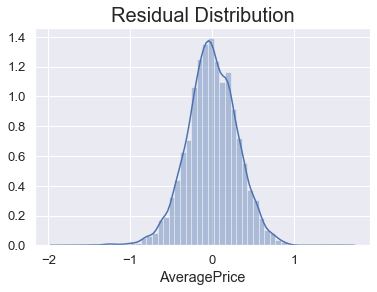

In [59]:
# errors also visualized in a residue plot
sns.distplot(y_test - reg.predict(X_test))
plt.title('Residual Distribution', fontsize = 20);

In [60]:
# confirm analysis using statmodel - to check for r-squared value
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     1148.
Date:                Sun, 14 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:12:02   Log-Likelihood:                -2665.2
No. Observations:               10878   AIC:                             5346.
Df Residuals:                   10870   BIC:                             5405.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2027      0.004     45.325   

In [61]:
# Next is to use decision tree regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [62]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=42)

# Create Model Object
decision_tree = DecisionTreeRegressor(max_depth=5) # set parameter, for splitting

# Fit into the model
decision_tree = decision_tree.fit(X_train, y_train)

# Run analysis - prediction
tree_test = decision_tree.predict(X_test) #output for predicted y_test
print(y_test, tree_test) #print output for y_test and predicted_y_test

12031    0.918386
4574    -0.268817
24124    1.028569
14431    0.704872
9173    -0.340075
           ...   
173     -0.074001
18547    0.475085
16742    0.189034
10045    0.124328
17341    0.378512
Name: AveragePrice, Length: 8703, dtype: float64 [ 0.37506216 -0.43915166  0.8983606  ...  0.41889814  0.19654214
  0.57851075]


In [63]:
print("Train Score: ", round((decision_tree.score(X_train,y_train)),3))
print("Test Score: ", round((decision_tree.score(X_test,y_test)),3))

Train Score:  0.556
Test Score:  0.538


In [64]:
print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, decision_tree.predict(X_test)),3))
print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, decision_tree.predict(X_test)),3))
print('Root Mean Square Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, decision_tree.predict(X_test))),3))

Mean Absolute Error (MAE):  0.219
Mean Squared Error (MSE):  0.078
Root Mean Square Error (RMSE): 0.279


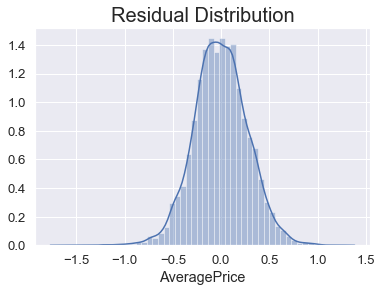

In [65]:
sns.distplot(y_test - decision_tree.predict(X_test))
plt.title('Residual Distribution', fontsize = 20);

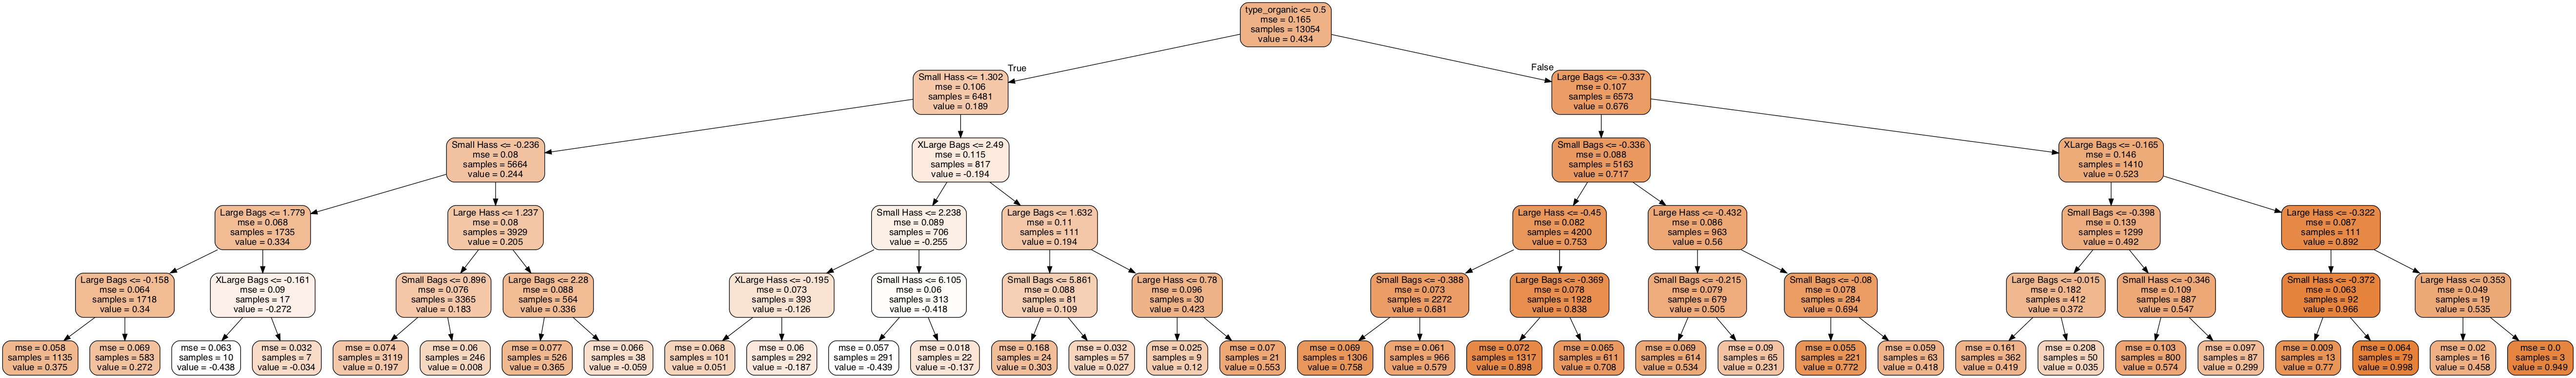

In [66]:
from sklearn import tree # Import decision tree function
from sklearn.tree import export_graphviz
from IPython.display import Image # To display a image
import pydotplus # To create decision tree graph

# Create feature names and Dot Data
fn = ['type_organic', 'Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']
cn = ['type_organic', 'Small Hass', 'Large Hass', 'XLarge Hass', 'Small Bags', 'Large Bags', 'XLarge Bags']

dot_data = export_graphviz(decision_tree, out_file=None, feature_names = fn, class_names= cn, filled=True, rounded=True)
                #special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [72]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state=42)

random_forest = RandomForestRegressor(max_depth=5)
#random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
print(random_forest.score(X_train,y_train)) 

0.583076732388818


In [73]:
print("Train Score: ", round((random_forest.score(X_train,y_train)),3))
print("Test Score: ", round((random_forest.score(X_test,y_test)),3))

Train Score:  0.583
Test Score:  0.568


In [74]:
print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y_test, random_forest.predict(X_test)),3))
print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y_test, random_forest.predict(X_test)),3))
print('Root Mean Square Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, random_forest.predict(X_test))),3))

Mean Absolute Error (MAE):  0.212
Mean Squared Error (MSE):  0.073
Root Mean Square Error (RMSE): 0.269


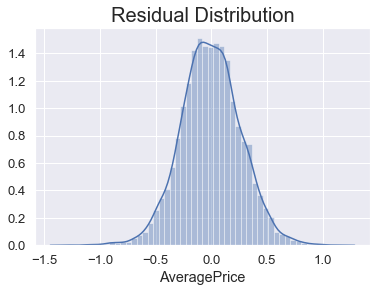

In [75]:
sns.distplot(y_test - random_forest.predict(X_test))
#plt.title('Residual Distribution', fontsize = 20);

In [77]:
print("To summarize the RSME in all 3 models:")
print()
print('Linear Regression RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),3))
#print("Linear Regression Test Score: ", round((reg.score(X_test,y_test)),3))
print()
print('Decision Tree Regression RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, decision_tree.predict(X_test))),3))
#print("Decision Tree Test Score: ", round((decision_tree.score(X_test,y_test)),3))
print()
print('Random Forest Regression RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, random_forest.predict(X_test))),3))
#print("Random Forest Test Score: ", round((random_forest.score(X_test,y_test)),3))

To summarize the RSME in all 3 models:

Linear Regression RMSE: 0.31

Decision Tree Regression RMSE: 0.279

Random Forest Regression RMSE: 0.269
